**Features CSV File Analysis**

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/kaggle/input/jane-street-real-time-market-data-forecasting/features.csv'
df = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Shape:", df.shape)
print("Column Types Overview:")
print(df.dtypes.value_counts())
print("\nFirst Few Rows of the Dataset:")
print(df.head())

# Check for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"Numeric Columns: {numeric_columns}")
print(f"Non-Numeric Columns: {non_numeric_columns}")

# Attempt to convert non-numeric columns to numeric
for col in non_numeric_columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except Exception as e:
        print(f"Could not convert column {col} to numeric. Error: {e}")

# Re-check numeric columns after conversion
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Updated Numeric Columns: {numeric_columns}")

# Check for columns with variance
valid_numeric_columns = [col for col in numeric_columns if df[col].nunique() > 1]
print(f"Valid Numeric Columns (with variance): {valid_numeric_columns}")

# If no valid numeric columns, inspect non-numeric data
if not valid_numeric_columns:
    print("No valid numeric columns found. Investigating non-numeric columns...")
    print(df[non_numeric_columns].head())
else:
    # Proceed with analysis (e.g., correlation matrix, heatmaps)
    correlation_matrix = df[valid_numeric_columns].corr()
    print("Correlation Matrix:")
    print(correlation_matrix)


Dataset Shape: (79, 18)
Column Types Overview:
bool      17
object     1
Name: count, dtype: int64

First Few Rows of the Dataset:
      feature  tag_0  tag_1  tag_2  tag_3  tag_4  tag_5  tag_6  tag_7  tag_8  \
0  feature_00  False  False   True  False  False  False  False  False  False   
1  feature_01  False  False   True  False  False  False  False  False  False   
2  feature_02  False  False   True  False  False  False  False  False  False   
3  feature_03  False  False   True  False  False  False  False  False  False   
4  feature_04  False  False   True  False  False  False  False  False  False   

   tag_9  tag_10  tag_11  tag_12  tag_13  tag_14  tag_15  tag_16  
0  False   False   False   False   False    True   False    True  
1  False   False   False   False    True    True   False    True  
2  False   False   False    True   False   False   False    True  
3  False   False   False   False    True   False   False    True  
4  False   False   False    True    True   False   Fa

**Responder CSV File Analysis**

Dataset Shape: (9, 6)

Column Data Types:
responder    object
tag_0          bool
tag_1          bool
tag_2          bool
tag_3          bool
tag_4          bool
dtype: object

First Few Rows:
     responder  tag_0  tag_1  tag_2  tag_3  tag_4
0  responder_0   True  False   True  False  False
1  responder_1   True  False  False   True  False
2  responder_2   True   True  False  False  False
3  responder_3  False  False   True  False   True
4  responder_4  False  False  False   True   True

Missing Values Per Column:
responder    0
tag_0        0
tag_1        0
tag_2        0
tag_3        0
tag_4        0
dtype: int64
No numeric columns found in the dataset.

Summary of Categorical Columns:
responder: 9 unique values


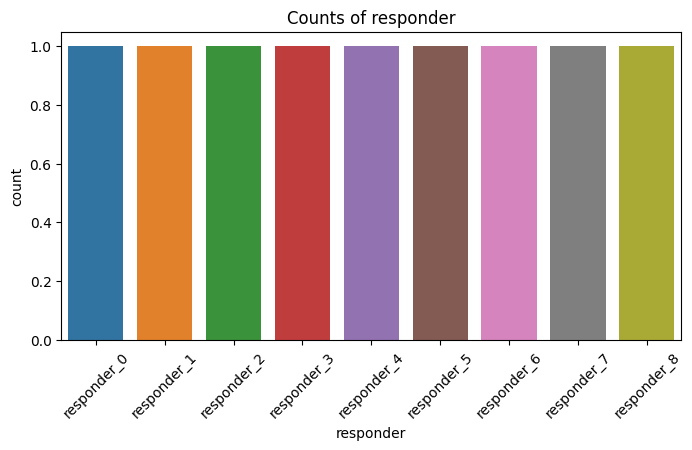

Not enough numeric columns for correlation analysis.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/jane-street-real-time-market-data-forecasting/responders.csv'
df = pd.read_csv(file_path)

# Check basic info about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:")
print(df.dtypes)
print("\nFirst Few Rows:")
print(df.head())
print("\nMissing Values Per Column:")
print(df.isnull().sum())

# Debug: Ensure DataFrame is not empty
if df.empty:
    raise ValueError("The dataset is empty. Please check the file.")

# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Debug: Ensure there are numeric columns
if numeric_columns.empty:
    print("No numeric columns found in the dataset.")
else:
    print("\nSummary of Numeric Columns:")
    print(df[numeric_columns].describe())

# Debug: Ensure there are categorical columns
if categorical_columns.empty:
    print("No categorical columns found in the dataset.")
else:
    print("\nSummary of Categorical Columns:")
    for col in categorical_columns:
        print(f"{col}: {df[col].nunique()} unique values")

# Handle Missing Values
if not numeric_columns.empty:
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Visualizations (if applicable)
if not numeric_columns.empty:
    for col in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.show()

if not categorical_columns.empty:
    for col in categorical_columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"Counts of {col}")
        plt.xticks(rotation=45)
        plt.show()

# Correlation Matrix (if numeric columns exist)
if len(numeric_columns) > 1:
    correlation_matrix = df[numeric_columns].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
    plt.title("Correlation Matrix of Numeric Features")
    plt.show()
else:
    print("Not enough numeric columns for correlation analysis.")



Sample Submission CSV File Analysis

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   row_id       39 non-null     int64  
 1   responder_6  39 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 752.0 bytes
None

First few rows:
   row_id  responder_6
0       0          0.0
1       1          0.0
2       2          0.0
3       3          0.0
4       4          0.0

Summary of Numeric Columns:
          row_id  responder_6
count  39.000000         39.0
mean   19.000000          0.0
std    11.401754          0.0
min     0.000000          0.0
25%     9.500000          0.0
50%    19.000000          0.0
75%    28.500000          0.0
max    38.000000          0.0

Summary of Categorical Columns:
No categorical columns found in the dataset.

Missing Values:
row_id         0
responder_6    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


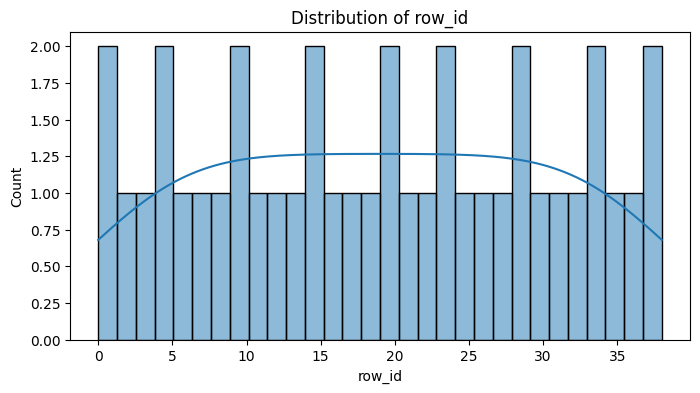

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


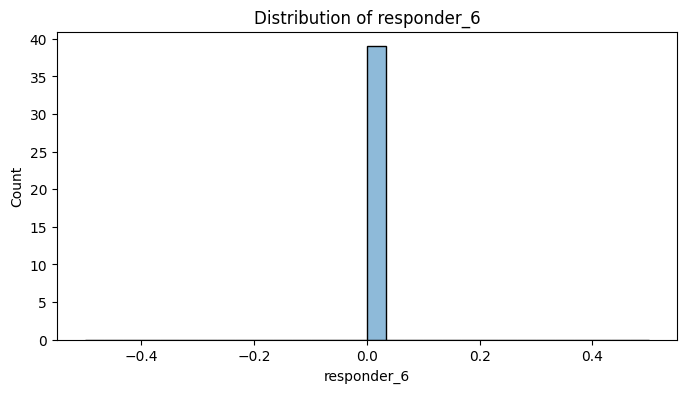

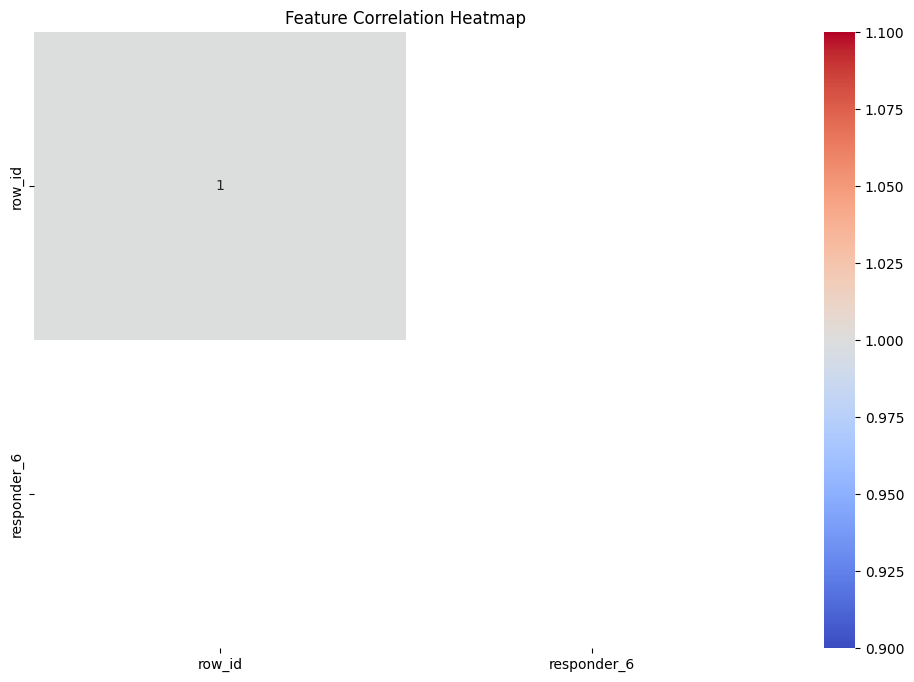

No categorical columns to visualize.

Dataset Shape:
(39, 2)

Unique Values in Each Column:
row_id         39
responder_6     1
dtype: int64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/kaggle/input/jane-street-real-time-market-data-forecasting/sample_submission.csv"
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Information:")
print(df.info())

# Display first few rows
print("\nFirst few rows:")
print(df.head())

# Replace inf and -inf values with NaN
df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

# 1. Summary of numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("\nSummary of Numeric Columns:")
if not numeric_columns.empty:
    print(df[numeric_columns].describe())
else:
    print("No numeric columns found in the dataset.")

# 2. Summary of categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("\nSummary of Categorical Columns:")
if not categorical_columns.empty:
    print(df[categorical_columns].describe())
else:
    print("No categorical columns found in the dataset.")

# 3. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 4. Visualize the distribution of numeric columns
if not numeric_columns.empty:
    for col in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.show()
else:
    print("No numeric columns to visualize.")

# 5. Correlation analysis for numeric columns
if len(numeric_columns) > 1:
    correlation_matrix = df[numeric_columns].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
    plt.title("Feature Correlation Heatmap")
    plt.show()
else:
    print("Not enough numeric columns for correlation analysis.")

# 6. Countplot for categorical columns (if any)
if not categorical_columns.empty:
    for col in categorical_columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, palette="viridis")
        plt.title(f"Countplot of {col}")
        plt.xticks(rotation=45)
        plt.show()
else:
    print("No categorical columns to visualize.")

# Additional Insights
print("\nDataset Shape:")
print(df.shape)
print("\nUnique Values in Each Column:")
print(df.nunique())


